Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 200, 128)          98816     
 onal)                                                           
                                                                 
 attention_1 (attention)     (None, 200, 128)          328       
                                                                 
 dropout_1 (Dropout)         (None, 200, 128)          0         
                                                                 
 dense_1 (Dense)             (None, 200, 1)            129       
                                                                 
Total params: 1379273 (5.26 MB)
Trainable params: 1379273 (5.26 MB)
Non-trainable params: 0 (0.00 Byte)
________________

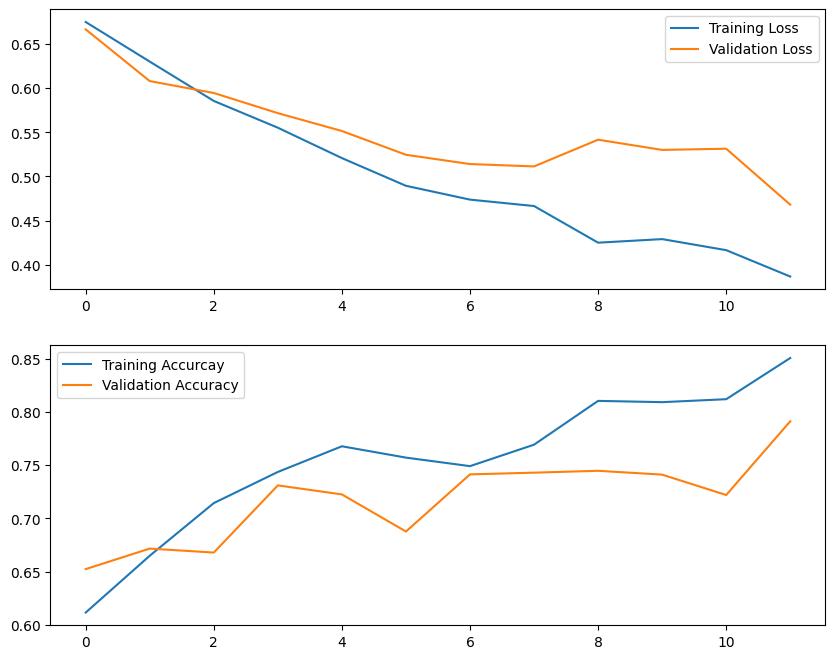

In [3]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb 
from keras.layers import *
from keras.models import *
from keras import backend as K
import matplotlib.pyplot as plt 

def get_data ():
    n_unique_words = 10000
    (x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=n_unique_words)
    print("x_train:",x_train[2:4])
    print("y_train:",y_train[2:4])


    maxlen = 200
    x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
    x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    # Our vectorized labels
    y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
    y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
    return x_train, y_train, x_test, y_test 
     
class attention(Layer):
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences

        super(attention,self).__init__()

    def build(self, input_shape):
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
            initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
            initializer="zeros")
    


    def call(self, x):
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        if self.return_sequences:

            return output
        return K.sum(output, axis=1)


def get_model (n_unique_words, maxlen):
    
    model2 = Sequential()
    model2.add(Embedding(n_unique_words, 128, input_length=maxlen))
    model2.add(Bidirectional(LSTM(64, return_sequences=True)))
    model2.add(attention(return_sequences=True)) # receive 3D and output 3D
    model2.add(Dropout(0.5))
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    model2.summary()
    return model2 




if __name__ == "__main__":
    n_unique_words = 10000
    maxlen = 200
    model2 = get_model (n_unique_words,maxlen)

    x_train, y_train, x_test, y_test  = get_data() 

    #rint("x_train:",x_train[2:4,:])
    #print("y_train:",y_train[2:4,:])
    
    batch_size = 40 
    
    hist =model2.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[x_test, y_test])
    print(hist.history['loss'])
    print(hist.history['accuracy']) 
    
    fig, axs  = plt.subplots (2,1,figsize=(10,8))
    axs[0].plot(hist.history['loss'],label='Training Loss')
    axs[0].plot(hist.history['val_loss'],label='Validation Loss')
    axs[1].plot(hist.history['accuracy'],label='Training Accurcay')
    axs[1].plot(hist.history['val_accuracy'],label='Validation Accuracy')
    axs[0].legend()
    axs[1].legend()
    plt.show()
